In [ ]:
# Load in our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from scipy import stats

In [ ]:
%cd '/content/drive/MyDrive/ML-DL/CodeGym'
!ls

/content/drive/MyDrive/ML-DL/CodeGym
advertising.csv				  Untitled11.ipynb  Untitled2.ipynb
Credit_Scoring.csv			  Untitled12.ipynb  Untitled3.ipynb
GDPlist.csv				  Untitled13.ipynb  Untitled4.ipynb
house_price_Dống-Da_Hà-Nội_subdata.csv	  Untitled14.ipynb  Untitled5.ipynb
insurance.csv				  Untitled15.ipynb  Untitled6.ipynb
OnlineRetail.csv			  Untitled16.ipynb  Untitled7.ipynb
shopeep_koreantop_clothing_shop_data.csv  Untitled17.ipynb  Untitled8.ipynb
Untitled0.ipynb				  Untitled18.ipynb  Untitled9.ipynb
Untitled10.ipynb			  Untitled1.ipynb


In [ ]:
df = pd.read_csv('advertising.csv', encoding="latin1")
df.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


In [ ]:
r1, pvalue1 = stats.spearmanr(df.TV, df.Sales)
print ("r1: ", r1, "; pvalue1: ", pvalue1)

r1:  0.9009956366533672 ; pvalue1:  9.699391979586503e-74


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


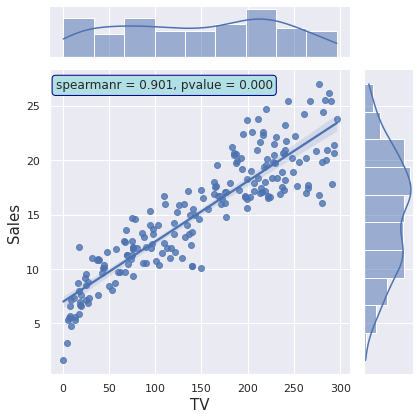

In [ ]:
g = sns.jointplot(df.TV, df.Sales, kind='reg')

r1, pvalue1 = stats.spearmanr(df.TV, df.Sales)
g.ax_joint.annotate(f'spearmanr = {r1:.3f}, pvalue = {pvalue1:.3f}',
                    xy=(0.02, 0.95), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
g.set_axis_labels(xlabel='TV', ylabel='Sales', size=15)
plt.tight_layout()
plt.show()

In [ ]:
X = df['TV'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 
regressor = LinearRegression()  # Khai báo mô hình hồi quy tuyến tính
regressor.fit(X_train, y_train) #Huấn luyện mô hình
print( "Mô hình hồi quy sẽ có dạng: Sales = a + b * TV \nvới các hệ số a và b lần lượt là")
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

Mô hình hồi quy sẽ có dạng: Sales = a + b * TV 
với các hệ số a và b lần lượt là
[7.14382225]
[[0.05473199]]


In [ ]:
y_hat_test = regressor.predict(X_test)

r2_train = r2_score(y_train, regressor.predict(X_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y_test, y_hat_test)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

print("\n") # xuống dòng

from sklearn import metrics
print('Mean Absolute Error MAE:', metrics.mean_absolute_error(y_test, y_hat_test))
print('Mean Squared Error MSE:', metrics.mean_squared_error(y_test, y_hat_test))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

R2 trên tập huấn luyện của model là:0.805941153711277
R2 trên tập kiểm tra của model là:0.8150168765722069


Mean Absolute Error MAE: 1.8639438916550555
Mean Squared Error MSE: 5.569539193467241
Root Mean Squared Error RMSE: 2.3599871172248466


In [ ]:
#Define target array y
y1= df['Sales'].values
y1= y1.reshape(-1,1)

#Create feature array X
X1= df.drop('Sales',axis=1).values

In [ ]:
#Split the arrays into training and testing data sets
X1_train, X1_test,y1_train, y1_test= train_test_split(X1,y1,test_size=0.3,random_state=42)

In [ ]:
#Create a regressor object
LR= LinearRegression()

#Fit training set to the regressor
LR.fit(X1_train,y1_train)

print("Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:")
print("Intercept =", LR.intercept_)
print("Coefficients:", LR.coef_)

Mô hình hồi quy tuyến tính đã được huấn luyện, có các tham số:
Intercept = [4.7437667]
Coefficients: [[0.05358869 0.10270677 0.00793167]]


In [ ]:
y1_hat_test = LR.predict(X1_test)

r2_train = r2_score(y1_train, LR.predict(X1_train))
print("R2 trên tập huấn luyện của model là:" + str(r2_train))
r2_test = r2_score(y1_test, y1_hat_test)
print("R2 trên tập kiểm tra của model là:" + str(r2_test))

print("\n") # xuống dòng

from sklearn import metrics
print('Mean Absolute Error MAE:', metrics.mean_absolute_error(y1_test, y1_hat_test))
print('Mean Squared Error MSE:', metrics.mean_squared_error(y1_test, y1_hat_test))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(y1_test, y1_hat_test)))

R2 trên tập huấn luyện của model là:0.8919647339302077
R2 trên tập kiểm tra của model là:0.9091484341849798


Mean Absolute Error MAE: 1.159487506109059
Mean Squared Error MSE: 2.5416240362291505
Root Mean Squared Error RMSE: 1.5942471691143598
